#  <center>Movies Recommendation System</center>
### <center>by Yassine Raouz</center>


<div>
<img src="Images/backg.png" width="800" height=300/>
</div>

# In this Notebook:
- [Introduction](#Intro)
    - Definition of Content-Based Filtering
    - Definition of Colaborative Filtering

- [Exploring Our Data](#Data1). 


- [Data Wrangling](#DW)  


- [EDA](#EDA)  


- [Pre-processing](#PP)  


- [Recommendation Engines:](#RE)  

    - [Weighted Average Rating (Simple)](#WR)  
        
    - [Content-Based Recommendation Engine](#Content) 
        
    - [Colaborative Recommendation Engine:](#Colab) 
    
        - [Using K-Nearest Neighbors](#Colab1)
        - [Using Surprise Package](#Colab2)


<a id='Intro'></a>
# Intro

A recommendation system is an artificial intelligence or AI algorithm, usually associated with machine learning, that uses Big Data to suggest or recommend additional products to consumers. These can be based on various criteria, including past purchases, search history, demographic information, and other factors. Recommender systems are highly useful as they help users discover products and services they might otherwise have not found on their own.

Recommender systems are trained to understand the preferences, previous decisions, and characteristics of people and products using data gathered about their interactions. These include impressions, clicks, likes, and purchases. Because of their capability to predict consumer interests and desires on a highly personalized level, recommender systems are a favorite with content and product providers. They can drive consumers to just about any product or service that interests them, from books to videos to health classes to clothing.

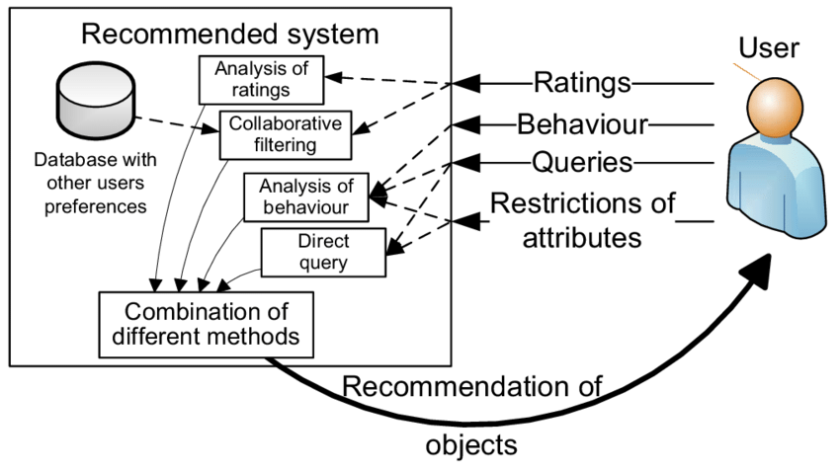

### Types of Recommendation Systems:
While there are a vast number of recommender algorithms and techniques, most fall into these general categories: collaborative filtering,  content filtering and a hybrid version of the two. Context filtering is another type, which includes users’ contextual information in a more detailed fashion.



### Content-based Filtering
Content filtering uses the attributes or features of an item to recommend other items similar to the user’s preferences. This approach is based on similarity of item and user features,  given information about a user and items they have interacted with (e.g. a user’s age, the category of a restaurant’s cuisine, the average review for a movie),  model the likelihood of a new interaction.  For example, if a content filtering recommender sees you liked the movie Notebook, it will recommend a movie of the same genre, time period and/or cast, such as Titanic or Dear John.

<div>
<img src="Images/content-based.png" width="500"/>
</div>

### Collaborative Filtering 
Collaborative filtering algorithms recommend items (this is the filtering part) based on preference information from many users (this is the collaborative part). This approach uses similarity of user preference behavior,  given previous interactions between users and items, recommender algorithms learn to predict future interaction. These recommender systems build a model from a user’s past behavior, such as items purchased previously or ratings given to those items and similar decisions by other users. The idea is that if some people have made similar decisions and purchases in the past, like a movie choice, then there is a high probability they will agree on additional future selections. For example, if a collaborative filtering recommender knows you and another user share similar tastes in movies, it might recommend a movie to you that it knows this other user already likes.

<div>
<img src="Images/img-2.png" width="500"/>
</div>

Collaborative filtering could be of 2 types. The two approaches are mathematically quite similar, but there is a conceptual difference between the two. Let's compare them:

**User-based**: For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

**Item-based**: For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.

<a id='Data1'></a>
# Our Data
[LINK TO THE DATA](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

Our dataset is an ensemble of data collected from TMDB and GroupLens.
The Movie Details, Credits and Keywords have been collected from the TMDB Open API. This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows.The Movie Ratings have been obtained from the Official GroupLens website.

The files present in this dataset contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

### Files used in this project

**movies_metadata.csv**: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.


**credits.csv**: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.


**ratings.csv**: Ratings submitted by users to the movies presents in our metadata movies. This file is about 700MB, and contains 26 million ratings, so we will only use a subset of it!

**ratings_small.csv**: The subset of 100,000 ratings from 700 users on 9,000 movies.

**keywords.csv**: Contains the movie plot keywords for our MovieLens movies. 

**links_small**: a small subset for our movies dataset. Only contains ID numbers to susbset our main dataframe with.



### Importing Packages

In [237]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from surprise import Reader, Dataset, SVD
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS
import ast

### Loading our Data

In [2]:
movies = pd.read_csv("/Users/raouz/Desktop/Capstone: Movies Recommender/data/raw/movies_metadata.csv")
ratings = pd.read_csv("/Users/raouz/Desktop/Capstone: Movies Recommender/data/raw/ratings.csv")
credits = pd.read_csv("/Users/raouz/Desktop/Capstone: Movies Recommender/data/raw/credits.csv")
keywords = pd.read_csv("/Users/raouz/Desktop/Capstone: Movies Recommender/data/raw/keywords.csv")
links_small = pd.read_csv("/Users/raouz/Desktop/Capstone: Movies Recommender/data/raw/links_small.csv")


/Users/raouz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#This will be the one used in our modeling phase.
ratings_small = pd.read_csv("/Users/raouz/Desktop/Capstone: Movies Recommender/data/raw/ratings_small.csv")

### Exploring our data

First, let's take a look at our main dataset containing information about the movies.

In [4]:
movies.head(5)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies.shape

(45466, 24)

This dataset contains data for 45'466 movies. Let's take a look at the 24 different columns, which we refer to as features.

In [6]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**For reference, this is the documentation for this dataset:**
- adult: Indicates if the movie is X-Rated or Adult.
- belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
- budget: The budget of the movie in dollars.
- genres: A stringified list of dictionaries that list out all the genres associated with the movie.
- homepage: The Official Homepage of the move.
- id: The ID of the movie.
- imdb_id: The IMDB ID of the movie.
- original_language: The language in which the movie was originally shot in.
- original_title: The original title of the movie.
- overview: A brief blurb of the movie.
- popularity: The Popularity Score assigned by TMDB.
- poster_path: The URL of the poster image.
- production_companies: A stringified list of production companies involved with the making of the movie.
- production_countries: A stringified list of countries where the movie was shot/produced in.
- release_date: Theatrical Release Date of the movie.
- revenue: The total revenue of the movie in dollars.
- runtime: The runtime of the movie in minutes.
- spoken_languages: A stringified list of spoken languages in the film.
- status: The status of the movie (Released, To Be Released, Announced, etc.)
- tagline: The tagline of the movie.
- title: The Official Title of the movie.
- video: Indicates if there is a video present of the movie with TMDB.
- vote_average: The average rating of the movie.
- vote_count: The number of votes by users, as counted by TMDB

Some of these features are irrelevant for our project, however, it is important to explore it to understand our data better. More data is better than no data. Usually with this many elements/rows comes Null values. Let's take a look at how many and where they are situated.  

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Tagline, homepage and belong_to_collection have a big number of Null values. However, we should not be concerned because those features won't be important for us later on. Only 6 titles are missing, but the original titles are all present, therefore it will be easy to fill in those missing values. Eveything else has either none or a small number of missing values, which if deleted will not affect our Recommendation system much. The only concern would be the 954 overviews missing, especially that we will use it later on for our content-based filtering. Let's now clean our data a little before analyzing it.

As for the other two files credits and ratings, there are no missing values. We will explore them more in our EDA phase.

In [9]:
ratings_small.shape

(100004, 4)

In [10]:
ratings_small.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
credits.shape

(45476, 3)

In [12]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

<a id='DW'></a>
## Data Wrangling 

We will now explore our main dataframe in order to spot any anomalies or irrelevant information. 

In [13]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


The Adult column seems to have a lot of False values, let's take a closer look.

In [14]:
pd.DataFrame(movies['adult'].value_counts())

,adult
False,45454
True,9
- Written by Ørnås,1
Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.,1
Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.,1


99% of the values are False. Therefore we will be dropping this column.

In [15]:
#dropping adult
movies = movies.drop('adult',axis=1)

Althought collection, tagline and homepage could be relevant in other cases, in our case we will not need the information present in them. Also, the amount of missing values in them exceeds the amount of values present and filling them won't be an easy task due to their uniqueness. 

In [16]:
movies = movies.drop('homepage',axis=1)
movies = movies.drop('belongs_to_collection',axis=1)
movies = movies.drop('tagline',axis=1)

Video contains multiple False values, so we will get rid of it aswell.

In [17]:
movies.value_counts('video')

video
False    45367
True        93
dtype: int64

In [18]:
movies = movies.drop('video',axis=1)

The imdb_id isn't relevant here because we already have another id number, which is the one related to the other files. The poster_path will be removed aswell.

In [19]:
#dropping both imdb id and poster path
movies = movies.drop('imdb_id',axis=1)
movies = movies.drop('poster_path',axis=1)

As for the languages present in the movie, we will only focus on the original language. So we will drop the spoen languages as they are usually not likely to attract a viewer to choose a movie over the other. 

In [20]:
movies = movies.drop('spoken_languages',axis=1)

Finally, we have 2 columns refering to the movie title. Let's see how much they differ from each other

In [21]:
movies[movies['title'] != movies['original_title']][['original_title','title']].head(15)

,original_title,title
28,La Cité des Enfants Perdus,The City of Lost Children
29,摇啊摇，摇到外婆桥,Shanghai Triad
32,"Guillaumet, les ailes du courage",Wings of Courage
57,Il postino,The Postman
58,Le confessionnal,The Confessional
67,Gazon maudit,French Twist
72,Les misérables,Les Miserables
79,بادکنک سفید,The White Balloon
81,Antonia,Antonia's Line
104,Keiner liebt mich,Nobody Loves Me


Multiple titles are different from the original. Some of the original titles are written in a different language, others in a different alphabet while others are not even in a String format. We know from before that only 6 titles are missing from our dataset, let's take a closer look to see if we can replace those null values by a relevant title

In [22]:
movies[movies['title'].isnull()][['id','title','original_title']]

,id,title,original_title
19729,82663,NaN,Midnight Man
19730,1997-08-20,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]"
29502,122662,NaN,マルドゥック・スクランブル 排気
29503,2012-09-29,NaN,"[{'iso_639_1': 'ja', 'name': '日本語'}]"
35586,249260,NaN,Avalanche Sharks
35587,2014-01-01,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]"


Midnight Man and Avalanche Sharks are actually good titles that we can add to our title column. However from looking at both of them, we see that their rows have all NaN values, so we won't bother switching their titles. 

In [23]:
movies[movies['id']=='82663']

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
19729,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",82663,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
movies[movies['id']=='249260']

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
35586,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",249260,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop the original title column, which won't make us lose much information and will make our life a little easier when searching for a specific movie later.

In [25]:
movies = movies.drop('original_title',axis=1)

Now that we dropped irrelevant columns, let's see how we can correct other columns to get the maximum amount of information from them and also to make our life easier during our EDA phase.

Let's look at Revenue and Budget. I have noticed few 0 values, which are most likely refering to an absence of the value rather than a true value. We will replace those values by NaN values, leaving us with only movies that have that info present, so we can have a better understanding of the amount of money that goes into movie making and its returns.

In [26]:
pd.DataFrame(movies['revenue'].value_counts())

,revenue
0.0,38052
12000000.0,20
10000000.0,19
11000000.0,19
2000000.0,18
...,...
245724603.0,1
12212123.0,1
8203235.0,1
25900.0,1


In [27]:
pd.DataFrame(movies['budget'].value_counts())

,budget
0,36573
5000000,286
10000000,259
20000000,243
2000000,242
...,...
328000,1
9750000,1
5510000,1
2150000,1


From earlier, we noticed that budget was considered an object by pandas, and that is due to certain entries. We will convert this column to numeric and replace the non-numeric values to NaN using the 'coerce' argument. 

In [28]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')

Let's check our work.

In [29]:
movies.budget.dtype

dtype('float64')

Since both budget and revenue have a lot of zeros, we will replace them with NaN values so they wont influence our analysis of the movies that have that specific data. This will help us during our EDA phase, however, we won't be using these columns during the building of our recommendation systems, due to the amount of missing values.

In [30]:
movies['budget'] = movies['budget'].replace(0, np.nan)
movies['revenue'] = movies['revenue'].replace(0, np.nan)

In [31]:
(movies[['revenue','budget']]==0).sum()

revenue    0
budget     0
dtype: int64

Finally, we will add a year column to extract the year from the release-date. Our Dates are in the format YYYY-MM-DD. So we will take the first number before the '-'.

In [32]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda date: str(date).split('-')[0] if date != np.nan else np.nan)


In [33]:
movies.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995
2,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,NaN,101.0,Released,Grumpier Old Men,6.5,92.0,1995
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995
4,NaN,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995


<a id='EDA'></a>
## EDA

Titles are the first thing we learn about any movies. Let's take a look at the most used words the titles in our dataset. We will use WordClound()

In [34]:
#Converting all titles to the type String
movies['title'] = movies['title'].astype('str')

In [35]:
#Creating a string with all the titles
title_string = ''.join(movies['title'])

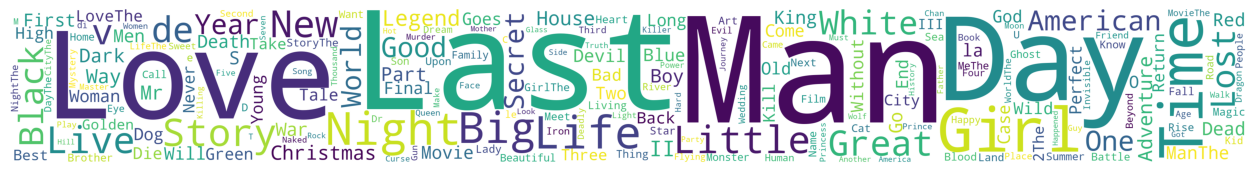

In [793]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',height=500,width=4000).generate(title_string)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

There is no surprise in finding both Girl and Man among the most used words in titles as most movies tell a story about a specific character. However, the word Love being in the top most used words could potentially mean that romance movies are dominating the other genres. Let's take a closer look at the different genres we have.

-------------------------------

The genres column is in the shape of a list of dictionary, containing the different genres this specific movie could fall into. We will be changing the genres columns into a list of genres for each movie. And since a movie could have more than 1 genre, we will take that into considerant and create a Series to help us count the number of each occurence.

We will be using the 'ast' package to extract the list of dictionaries from each entry. Every row of genre is structured like this: 

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [37]:
#Function to extract all genres
def all_genres(movie):
    L=[]
    for i in ast.literal_eval(movie):
        L.append(i['name'])
    return L

In [38]:
'''
#Function to extract first genre only
def top_genre(obj):
    L=''
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=1:
            L=i['name']
            counter +=1
        else:
            break
    return L
'''

"\n#Function to extract first genre only\ndef top_genre(obj):\n    L=''\n    counter = 0\n    for i in ast.literal_eval(obj):\n        if counter !=1:\n            L=i['name']\n            counter +=1\n        else:\n            break\n    return L\n"

In [39]:
movies['all_genres'] = movies['genres'].apply(all_genres)

In [40]:
movies['all_genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: all_genres, Length: 45466, dtype: object

Now that we have the genres as a list of strings, we will separate them and duplicate the other information for each row. This will help us have a precise count for each occurance.

In [41]:
stack  = movies.apply(lambda x: pd.Series(x['all_genres']),axis=1).stack()

/var/folders/t1/f9772nmn7tg6yj4hc67vk1500000gn/T/ipykernel_5397/3343369702.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stack  = movies.apply(lambda x: pd.Series(x['all_genres']),axis=1).stack()


In [42]:
stack

0      0    Animation
       1       Comedy
       2       Family
1      0    Adventure
       1      Fantasy
              ...    
45461  1       Family
45462  0        Drama
45463  0       Action
       1        Drama
       2     Thriller
Length: 91106, dtype: object

Let's reset the index and drop the 2nd index.

In [43]:
stack = stack.reset_index(level=1, drop=True)

Now let's join our stack series to the movies dataframe, creating a new dataframe called genres_df

In [44]:
#the series needs a name to be joined to a df
stack.name = 'stack'
genres_df = movies.join(stack)
genres_df.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,all_genres,stack
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,"[Animation, Comedy, Family]",Animation
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,"[Animation, Comedy, Family]",Comedy
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,"[Animation, Comedy, Family]",Family
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,"[Adventure, Fantasy, Family]",Adventure
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,"[Adventure, Fantasy, Family]",Fantasy


Now let's look at how our dataset is distributed genres wise.

In [45]:
count_genre = pd.DataFrame(genres_df['stack'].value_counts()).reset_index()

In [46]:
count_genre.columns = ['Genre','Number of movies']
count_genre.head(10)

,Genre,Number of movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


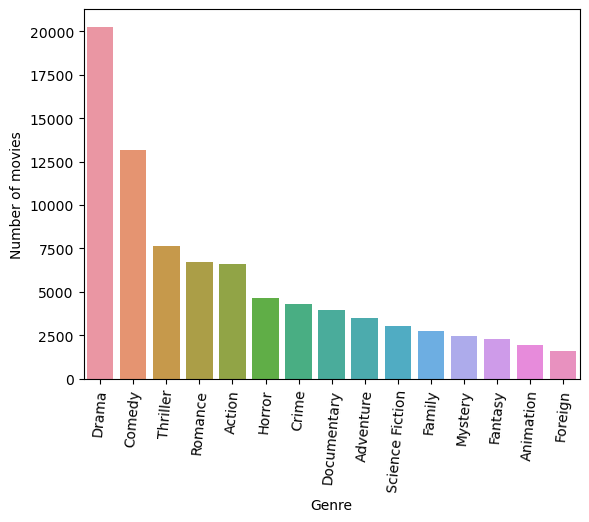

In [47]:
#Displaying the top 15 genres
sns.barplot(x='Genre', y='Number of movies', data=count_genre.head(15))
plt.xticks(rotation = 85)
plt.show()

We clearly see that Drama is a dominant category in our movies dataset. This matches our previous observation when we analyzed the words present in the titles. Comedy comes in second, while romance which is usually connected with Drama falls in 4th position. But, when did Drama take over? or has it always been the leading genre?

In [48]:
#Let's clean up our year column so it can be a numerical value rather than an object
movies['year'] = movies['year'].replace('NaT', np.nan)
genres_df['year'] = genres_df['year'].replace('NaT', np.nan)

In [49]:
def clean_num(x):
    try:
        return float(x)
    except:
        return np.nan

In [50]:
movies['year'] = movies['year'].apply(clean_num)

In [51]:
genres_df['year'] = genres_df['year'].apply(clean_num)

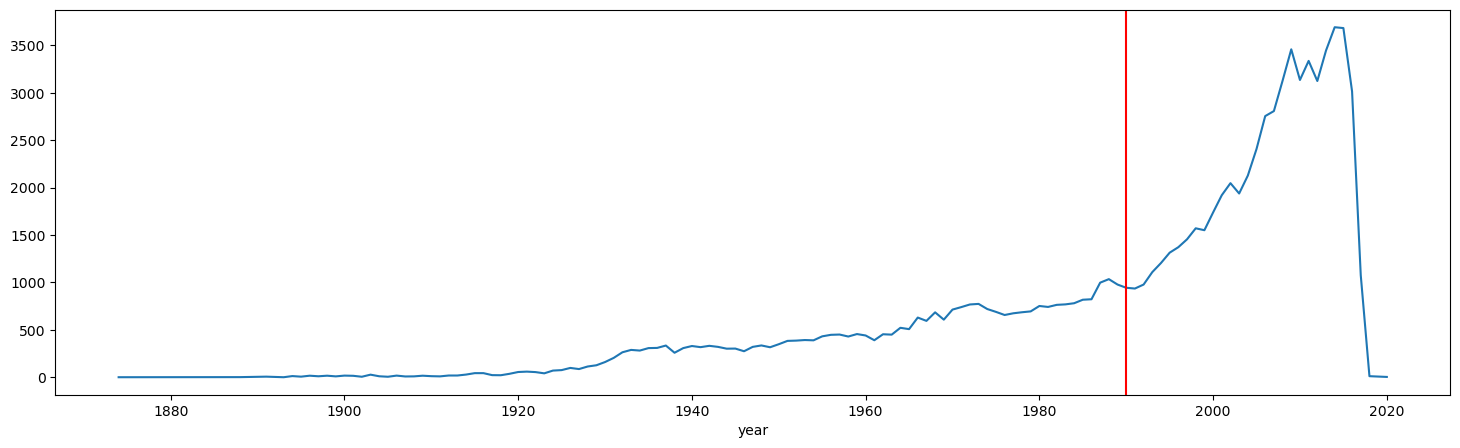

In [52]:
#How many movies per year
year_count = genres_df.groupby('year')['title'].count()

plt.figure(figsize=(18,5))
year_count.plot()
plt.axvline(1990, color='red')
plt.show()

it could be the fact that not many movies were produced in the past, or we just don't have data on them. Regardless, we notice that around 1990, movies were being released at a higher rate. But how does that vary with the different genres? let's take a look to the only the top genres and the movies released afer 1990.

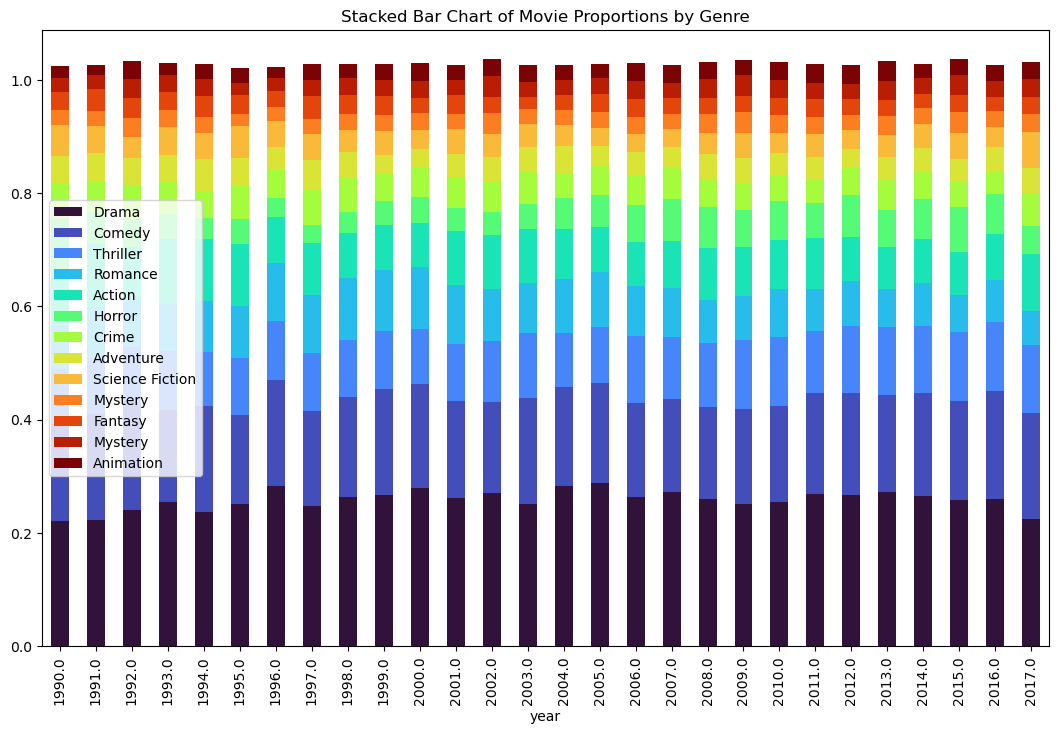

In [53]:
#Only focusing on the top genres up to Animation
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']
pop_gen_movies = genres_df[(genres_df['stack'].isin(genres)) & (genres_df['year'] >= 1990) & (genres_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['stack']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True,colormap = 'turbo', figsize=(13,8)).legend(loc='center left')
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

We clearly seem that Drama has been the leading genre for at least the past 20 years, and it had its peak in 1996. Comedy has and still is second but it experienced a little decrease throught out the years, and that is probably due to the creation of new genres. All the other genres were pretty consistent. Let's take a closer look:

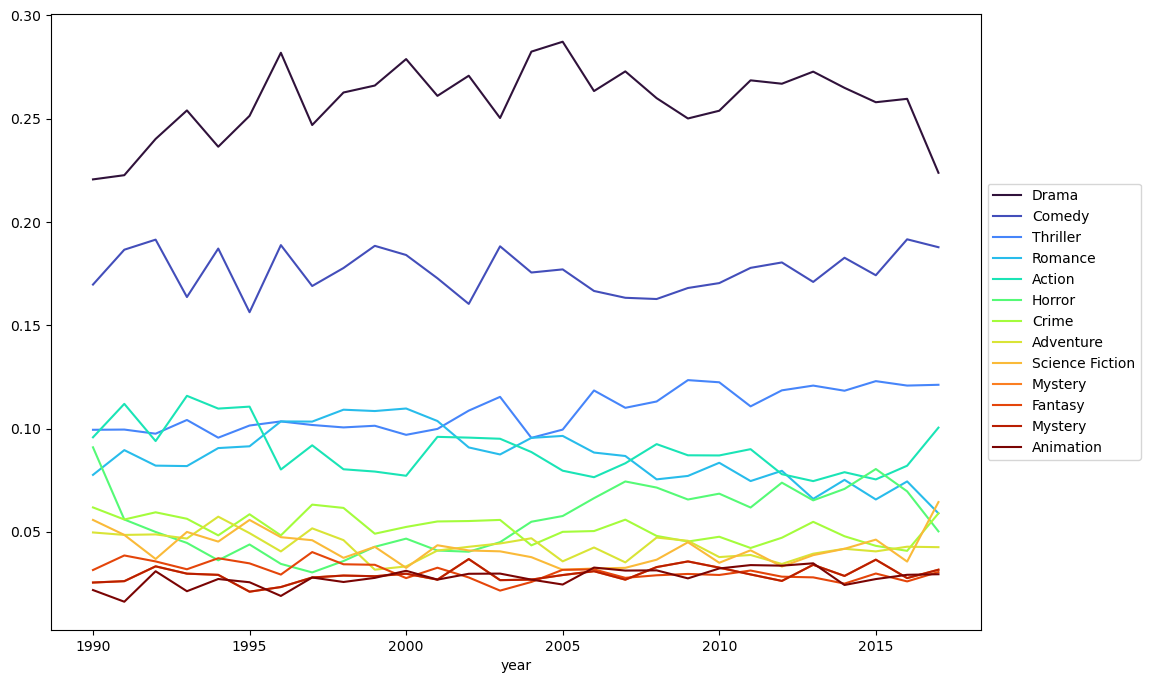

In [54]:
ctab[genres].plot(kind='line', stacked=False, colormap='turbo', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

So if Drama is a dominant genre, does that mean it brings more revenue? Let's compare the genres based on the revenue of the movies we have data for.

<Figure size 2000x1000 with 0 Axes>

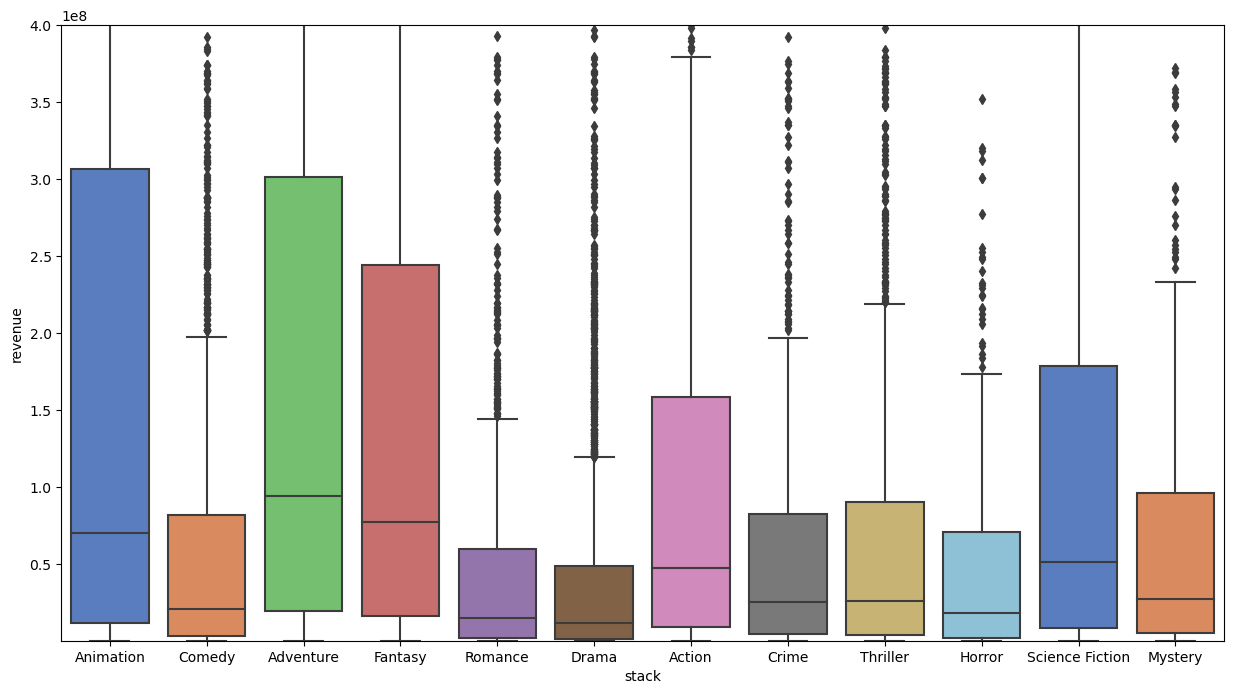

In [55]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='stack', y='revenue', data=pop_gen_movies, palette="muted", ax =ax)
ax.set_ylim([1, 4e8])
plt.show()

We can clearly see the several outliers present for some of these genres. However, we see that Animation, Adventure, Fantasy and to some extend Action and SciFiction are topping our revenue distribution. So what's common about this genres? I believe that movies with these kind of genres, are usually made in sequels, which not only generates more revenue per movie, but also attracts more viewers due to its ability to promote itself. For example if you watch the Harry Potter 4, which is one of the most popular animation movies, it will trigger your curiosity to watch the other ones.


-------------

Since we started talking about money, let's take a close look to the revenue and budget columns.


Before we do so, we need to give a score to each movie in regards to how much money it made compared to the money spent. The return column will be a ratio of revenue over budget, which will be a value larger than one if there is profit and less than 1 if there is a loss.

In [56]:
movies['return']= movies['revenue'] / movies['budget']

In [57]:
#precentage of movies with return data
(movies['return'].notnull().sum()/len(movies))*100

11.835217525183655

Only 5381 movies have a return value in our data set, representing approximately 12% of our dataset. This is a low number to make assumptions about our dataset, but for EDA purposes we will work with this data.

Let's start by looking at the most expensive movie.

In [58]:
movies[movies['budget'].notnull()][['title', 'budget', 'revenue','return', 'year','all_genres']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year,all_genres
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011.0,"[Adventure, Action, Fantasy]"
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007.0,"[Adventure, Fantasy, Action]"
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015.0,"[Action, Adventure, Science Fiction]"
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006.0,"[Adventure, Fantasy, Action, Science Fiction]"
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017.0,"[Action, Science Fiction, Thriller, Adventure]"
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010.0,"[Animation, Family]"
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012.0,"[Action, Adventure, Science Fiction]"
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007.0,"[Fantasy, Action, Adventure]"
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013.0,"[Action, Adventure, Western]"
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013.0,"[Adventure, Fantasy]"


Pirates of the Caribbean tops the list with 2 of their movies. We notice that the adventure genre is dominant in our top 10 most expensive movies; fantasy is frequent aswell. This could be explained by the amount of money that goes into making the visuals, decor and stunts. Only one movie in this top 10 did not make profit and it is the Lone Ranger. Even having Johnny Depp as a main character was not enough to interest the viewers, which made this movie a big flop. That brings us to talk about revenue. Let's take a look at our top 10 in regards to revenue

In [59]:
movies[movies['budget'].notnull()][['title', 'budget', 'revenue','return', 'year','all_genres']].sort_values('revenue', ascending=False).head(10)



,title,budget,revenue,return,year,all_genres
14551,Avatar,237000000.0,2.787965e+09,11.763566,2009.0,"[Action, Adventure, Fantasy, Science Fiction]"
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,8.441729,2015.0,"[Action, Adventure, Science Fiction, Fantasy]"
1639,Titanic,200000000.0,1.845034e+09,9.225171,1997.0,"[Drama, Romance, Thriller]"
17818,The Avengers,220000000.0,1.519558e+09,6.907081,2012.0,"[Science Fiction, Action, Adventure]"
25084,Jurassic World,150000000.0,1.513529e+09,10.090192,2015.0,"[Action, Adventure, Science Fiction, Thriller]"
28830,Furious 7,190000000.0,1.506249e+09,7.927628,2015.0,[Action]
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015.0,"[Action, Adventure, Science Fiction]"
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,10.736000,2011.0,"[Family, Fantasy, Adventure]"
22110,Frozen,150000000.0,1.274219e+09,8.494793,2013.0,"[Animation, Adventure, Family]"
42222,Beauty and the Beast,160000000.0,1.262886e+09,7.893040,2017.0,"[Family, Fantasy, Romance]"


Who else but Avatar. This movie was the first one to break the 2 billion revenue since Titanic. 9 out of 10 of these movies were made in the past past 10 years (considering that this dataset goes up to 2017), which could be explained by inflation and also the presence of more movie theatre and streaming platforms. Drama, which we learned previously is the most dominant genre, finally made an apperance in both the revenue and budget ranking, and that is thanks to Titanic, one of the most iconic movies ever produced. 

But how does budget and revene related to each other? Let's take a look

0.7302708168889313

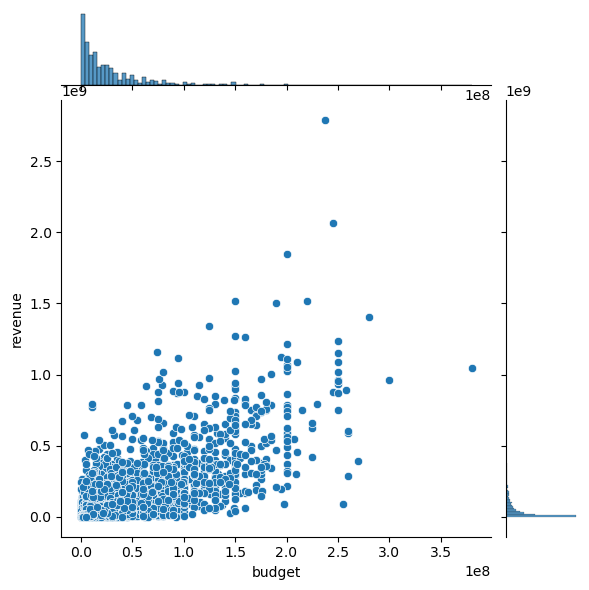

In [60]:
_=sns.jointplot(x='budget',y='revenue',data=movies[movies['return'].notnull()])

movies['budget'].corr(movies['revenue'])

We clearly see that the two are correlated to an extent, withc Pearson score of '0.73'. Therefore, we can say that generally if you put in more money in the production of a movie, you are more likely to make more money back.

Now, let's check out the ranking based on the combination of budget and revenue, the return!

In [61]:
movies[movies['budget'].notnull()][['title', 'budget', 'revenue','return', 'year','all_genres']].sort_values('return', ascending=False).head(10)


,title,budget,revenue,return,year,all_genres
4000,Less Than Zero,1.0,12396383.0,1.239638e+07,1987.0,"[Drama, Crime, Romance]"
3342,Modern Times,1.0,8500000.0,8.500000e+06,1936.0,"[Drama, Comedy]"
14372,Welcome to Dongmakgol,8.0,33579813.0,4.197477e+06,2005.0,"[War, Comedy, Drama, History]"
22278,Aquí Entre Nos,1.0,2755584.0,2.755584e+06,2012.0,[Comedy]
2308,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0,"[Adventure, Drama, Action, Romance, Family]"
25989,Nurse 3-D,10.0,10000000.0,1.000000e+06,2013.0,"[Horror, Thriller]"
16664,From Prada to Nada,93.0,2500000.0,2.688172e+04,2011.0,"[Comedy, Drama, Romance]"
14192,Paranormal Activity,15000.0,193355800.0,1.289039e+04,2007.0,"[Horror, Mystery]"
8211,Tarnation,218.0,1162014.0,5.330339e+03,2003.0,"[Documentary, Drama]"
2595,The Blair Witch Project,60000.0,248000000.0,4.133333e+03,1999.0,"[Horror, Mystery]"


The problem with this is the presence of small values in the budget, which could be either totally wrong or in a different unit (most likely millions). Well to avoid this, we will only consider movies that have a budget greater than 10 Million.

In [62]:
movies[(movies['return'].notnull()) & (movies['budget'] > 10e6)][['title','return', 'budget', 'revenue',  'year','all_genres']].sort_values('return', ascending=False).head(10)



,title,return,budget,revenue,year,all_genres
1065,E.T. the Extra-Terrestrial,75.520507,10500000.0,792965326.0,1982.0,"[Science Fiction, Adventure, Family, Fantasy]"
256,Star Wars,70.490728,11000000.0,775398007.0,1977.0,"[Adventure, Action, Science Fiction]"
590,Pretty Woman,33.071429,14000000.0,463000000.0,1990.0,"[Romance, Comedy]"
18465,The Intouchables,32.806221,13000000.0,426480871.0,2011.0,"[Drama, Comedy]"
1154,The Empire Strikes Back,29.911111,18000000.0,538400000.0,1980.0,"[Adventure, Action, Science Fiction]"
41820,Dangal,29.807692,10400000.0,310000000.0,2016.0,[Drama]
16129,The King's Speech,27.614103,15000000.0,414211549.0,2010.0,"[Drama, History]"
579,Home Alone,26.482482,18000000.0,476684675.0,1990.0,"[Comedy, Family]"
23512,The Fault in Our Stars,25.597236,12000000.0,307166834.0,2014.0,"[Romance, Drama]"
16066,Black Swan,25.215672,13000000.0,327803731.0,2010.0,"[Drama, Thriller]"


This ranking contains multiple movies made before the 2000's, which could be explained by how these movies were passed through generations due to their popularity, so they generated more money throughout the years. Again, we see that Adventure and Fantasy are present in the top movie! which shows how much money goes into those genres, whether it is to make the movie or the profit generated from it.

-------

What is more important than money in movies success? One could argue that the more money put in production, marketing and cast the more successful your movie will be. This also goes along with how budget and revenue are correlated. However, at the end of the day, if us viewers don't like the movie, then it won't be successful one. The viewers are the main source of Revenue; the more demand there is, the higher the revenue will be. Recommender systems, which our the main subject of our project, are not usually based on how much money is invested in the movie, but they are most certainly based on the viewers/users behavior. Indeed, a content based recommendation system could potentially take money into consideration, however, it isn't as important as the content of movie, its cast or its genre. Our data sets offers 3 useful columns for us: Popularity, vote_count and vote_average. Let's check them out and analyze the data present.

In [63]:
#Cleaning the columns using clean_num function
movies['popularity'] = movies['popularity'].apply(clean_num).astype('float')
movies['vote_count'] = movies['vote_count'].apply(clean_num).astype('float')
movies['vote_average'] = movies['vote_average'].apply(clean_num).astype('float')


In [64]:
movies[['popularity','vote_count','vote_average']].dtypes

popularity      float64
vote_count      float64
vote_average    float64
dtype: object

Let's check out the most popular movies based on our dataset score.

In [65]:
movies.popularity.describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [66]:
movies[['title', 'popularity', 'year','all_genres']].sort_values('popularity', ascending=False).head(5)

,title,popularity,year,all_genres
30700,Minions,547.488298,2015.0,"[Family, Animation, Adventure, Comedy]"
33356,Wonder Woman,294.337037,2017.0,"[Action, Adventure, Fantasy]"
42222,Beauty and the Beast,287.253654,2017.0,"[Family, Fantasy, Romance]"
43644,Baby Driver,228.032744,2017.0,"[Action, Crime]"
24455,Big Hero 6,213.849907,2014.0,"[Adventure, Family, Animation, Action, Comedy]"


The Minions being top of this list is not surprising, as it was such a success that they made more minions movies later. However, a score of 547 is quiet an outlier, since the mean of this score is only 2.9 and 50% of the data has a score of less than 1.2. Two out of the top 5 most popular movies are Animation, which shows how this genre has potential to manifest itself more in the future among the main ones.

Let's look at how vote_average is distributed and see what movies received the highest average.

In [67]:
movies[movies['vote_count'] > 2500][['vote_average']].describe()

,vote_average
count,377.000000
mean,7.089655
std,0.740740
min,4.900000
25%,6.600000
50%,7.200000
75%,7.700000
max,8.500000


/var/folders/t1/f9772nmn7tg6yj4hc67vk1500000gn/T/ipykernel_5397/3633747589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies[movies['vote_count'] > 2500]['vote_average'].fillna(movies['vote_average'].median()))


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

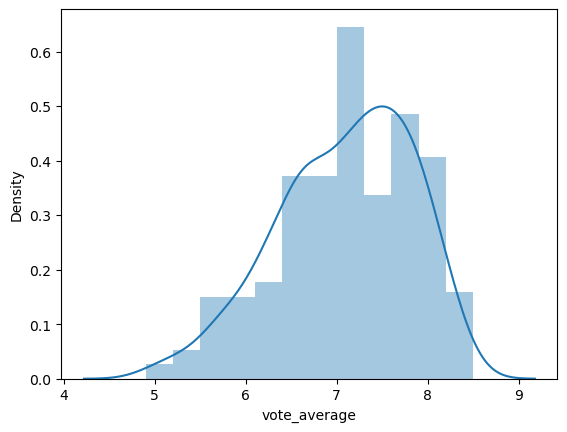

In [68]:
sns.distplot(movies[movies['vote_count'] > 2500]['vote_average'].fillna(movies['vote_average'].median()))

In [69]:
#Using a minimun required votes of 2500.


movies[movies['vote_count'] > 2500][['title', 'vote_average','vote_count', 'year','all_genres']].sort_values('vote_average', ascending=False).head(5)

,title,vote_average,vote_count,year,all_genres
834,The Godfather,8.5,6024.0,1972.0,"[Drama, Crime]"
314,The Shawshank Redemption,8.5,8358.0,1994.0,"[Drama, Crime]"
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975.0,[Drama]
1178,The Godfather: Part II,8.3,3418.0,1974.0,"[Drama, Crime]"
2843,Fight Club,8.3,9678.0,1999.0,[Drama]


We only considered movies that have more than 2500 votes, whcih is only half of what IMDB usually requires to be on their top 250. We notice that Drama is a dominant genre in this ranking, which shows that the dominance of Drama movies that we saw previously is explained by how much people love this genre. Crime makes an apperance too, which makes it critically acclaimed genre as well. After filtering our dataset to only movies with more than 2500, we notice that they have a normal distribution with a mean of about 7. The highest score was 8.5 while the lowest was 4.9. Let's see what movies has the worst vote average. 

In [70]:
movies[movies['vote_count'] > 2500][['title', 'vote_average','vote_count', 'year','all_genres']].sort_values('vote_average', ascending=True).head(5)




,title,vote_average,vote_count,year,all_genres
30556,Independence Day: Resurgence,4.9,2550.0,2016.0,"[Action, Adventure, Science Fiction]"
21018,After Earth,5.0,2579.0,2013.0,"[Science Fiction, Action, Adventure]"
17272,Green Lantern,5.1,2551.0,2011.0,"[Adventure, Action, Thriller, Science Fiction]"
27478,Fifty Shades of Grey,5.2,3350.0,2015.0,"[Drama, Romance, Thriller]"
20447,A Good Day to Die Hard,5.2,3519.0,2013.0,"[Action, Thriller]"


All these movies were released in the past few years and have a decent amount of votes. Action is the most common genre among these movies.

What movies receives the most votes?

In [71]:
movies[['title', 'vote_average','vote_count', 'year','all_genres']].sort_values('vote_count', ascending=False).head(5)



,title,vote_average,vote_count,year,all_genres
15480,Inception,8.1,14075.0,2010.0,"[Action, Thriller, Science Fiction, Mystery, A..."
12481,The Dark Knight,8.3,12269.0,2008.0,"[Drama, Action, Crime, Thriller]"
14551,Avatar,7.2,12114.0,2009.0,"[Action, Adventure, Fantasy, Science Fiction]"
17818,The Avengers,7.4,12000.0,2012.0,"[Science Fiction, Action, Adventure]"
26564,Deadpool,7.4,11444.0,2016.0,"[Action, Adventure, Comedy]"


Inception has received the most amount of votes and has a solid vote average too, which is not surprising considering how great that movie is. The other four movies are definitely popular nowadays, however, it is deceiving to see a low score for them especially Avatar, which generated a lot of revenue.

How does the vote count and the vote average relate?

0.12360664415826994

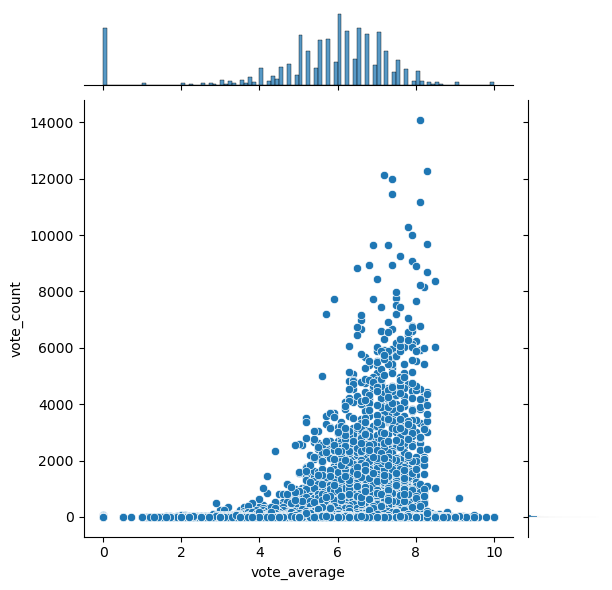

In [72]:
sns.jointplot(x='vote_average', y='vote_count', data=movies)
movies['vote_average'].corr(movies['vote_count'])


The correlation is pretty low with only a score of 0.12. We can clearly tell that there is just a little correlation between the two, which tells us that having a high number of votes doesn't necessarily means you have a high average. This gives credibility to the platform aswell and shows that people usually give honest reviews.

<a id='PP'></a>
## Pre Processing

Before we move to building our different recommendation systems, let's prepare our data.

We will need to join our movies dataframe with the credits and keywords. Before we do so, we will make sure our ID columns, which we will be joining on, is numeric

In [73]:
def make_int(ID):   
    try:
        return int(ID)
    except:
        return np.nan

In [74]:
movies['id'] = movies['id'].apply(make_int)

Let's drop the rows without an ID

In [75]:
movies[movies['id'].isnull()]

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,all_genres,return
19730,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...",NaN,104.0,Released,NaN,False,6.0,1,NaN,NaN,NaN,nan,NaN,NaN,NaN,"[Carousel Productions, Vision View Entertainme...",NaN
29503,NaN,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",NaN,68.0,Released,NaN,False,7.0,12,NaN,NaN,NaN,nan,NaN,NaN,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...",NaN
35587,NaN,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",NaN,82.0,Released,NaN,False,4.3,22,NaN,NaN,NaN,nan,NaN,NaN,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...",NaN


In [76]:
movies = movies.drop([19730, 29503, 35587])

In [77]:
#the id column in the credits dataset is of type int
movies.id = movies.id.astype(int)

In [78]:
movies = movies.merge(credits, on='id')

In [79]:
movies = movies.merge(keywords, on='id')

Now let's drop all the columns we won't be needing anymore.

In [80]:
movies = movies.drop(['budget','genres','original_language','production_companies','production_countries','release_date','revenue','return','runtime','status'],axis=1)

In [81]:
movies.head(3)

,id,overview,popularity,title,vote_average,vote_count,year,all_genres,cast,crew,keywords
0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


<a id='RE'></a>
# Recommendation Engines:

<a id='WR'></a>
## Simple Recommendation System using Weighted Rating

Weighted Rating (WR)  

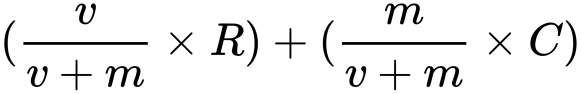
where,
- v is the number of votes for the movie
- m is the minimum votes required to be listed in the chart
- R is the average rating of the movie
- C is the mean vote across the whole report


m is usually pre-decided depending on the platform, in our case we will use the 90th percentile to determine how many votes are required

In [83]:
m = movies[movies['vote_count'].notnull()]['vote_count'].quantile(0.90)
m

156.0

In [84]:
C = movies[movies['vote_average'].notnull()]['vote_average'].mean()
C

5.611727865476706

In [85]:
df_90th = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average']\
                    .notnull())][['id','title',  'vote_count', 'vote_average', 'popularity', 'year','all_genres']]

In [86]:
df_90th.shape

(4680, 7)

In [87]:
#function to calculate the weighted average for our dataframe
def wr(df):
    v = df['vote_count']
    R = df['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [88]:
#naming the weighted average column Score
df_90th['score'] = df_90th.apply(wr,axis=1)

In [124]:
recommendation_df = pd.merge(movies,df_90th[['id','score']],on='id', how='left')

In [90]:
new.head(2)

,id,overview,popularity,title,vote_average,vote_count,year,all_genres,cast,crew,keywords,score
0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",7.641524
1,8844,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",6.821771


Now if we want to recommend a movie based on our weighted average that takes the vote average and count into consideration, all we have to do is sort our new dataframe:

In [91]:
df_90th.sort_values('score', ascending=False).head(10)

,id,title,vote_count,vote_average,popularity,year,all_genres,score
314,278,The Shawshank Redemption,8358.0,8.5,51.645403,1994.0,"[Drama, Crime]",8.447079
10397,19404,Dilwale Dulhania Le Jayenge,661.0,9.1,34.457024,1995.0,"[Comedy, Drama, Romance]",8.433941
841,238,The Godfather,6024.0,8.5,41.109264,1972.0,"[Drama, Crime]",8.427092
12589,155,The Dark Knight,12269.0,8.3,123.167259,2008.0,"[Drama, Action, Crime, Thriller]",8.266248
2870,550,Fight Club,9678.0,8.3,63.869599,1999.0,[Drama],8.257355
292,680,Pulp Fiction,8670.0,8.3,140.950236,1994.0,"[Thriller, Crime]",8.252485
522,424,Schindler's List,4436.0,8.3,41.725123,1993.0,"[Drama, History, War]",8.208674
23868,244786,Whiplash,4376.0,8.3,64.299990,2014.0,[Drama],8.207465
5529,129,Spirited Away,3968.0,8.3,41.048867,2001.0,"[Fantasy, Adventure, Animation, Family]",8.198310
2231,637,Life Is Beautiful,3643.0,8.3,39.394970,1997.0,"[Comedy, Drama]",8.189610


We can clearly see the presence of the Drama genre in the top 10 movies based on weighted average score. I believe that this ranking would have been different if we picked a more strict percentile for our vote count.For example a movie like 'Dilwale Dulhania Le Jayenge' would not have figured among these movies. This type recommender system is simple and isn't specific enough to any viewer or category, it is purely based on scores obtained from people that we have no idea what their movie taste is like. To make it better let's construct a way to recommend movies based on genres.

In [92]:
#using the same code we used durin EDA
stack = movies.apply(lambda x: pd.Series(x['all_genres']),axis=1).stack().reset_index(level=1, drop=True)
stack.name = 'genre'
genres_df = movies.drop('all_genres', axis=1).join(stack)

/var/folders/t1/f9772nmn7tg6yj4hc67vk1500000gn/T/ipykernel_5397/3935817902.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stack = movies.apply(lambda x: pd.Series(x['all_genres']),axis=1).stack().reset_index(level=1, drop=True)


Now that we have our new dataframe where each row only has one entry for the genre, let's recommend some movies by building a function that takes a genre and returns the top 10 movies of that genre based on weighted average. This should follow the same structure as before.

In [93]:
def recommend_genre(genre):
    try:
        
        #subset for the genre only
        df = genres_df[genres_df['genre'] == genre]
        #calculating C and m
        C = df[df['vote_average'].notnull()]['vote_average'].mean()
        m = df[df['vote_average'].notnull()]['vote_average'].quantile(0.90)

        #subsetting based on m and non null values
        qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title',  'vote_count', 'vote_average', 'popularity', 'year']]
        qualified['vote_count'] = qualified['vote_count'].astype('int')
        qualified['vote_average'] = qualified['vote_average'].astype('int')

        qualified['score'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
        qualified = qualified.sort_values('score', ascending=False).head(250)

        return qualified.head(10)
    except:
        return print('WRONG GENRE INPUT')

In [794]:
recommend_genre('Animation')

,title,vote_count,vote_average,popularity,year,score
359,The Lion King,5520,8,21.605761,1994.0,7.997611
5529,Spirited Away,3968,8,41.048867,2001.0,7.996678
9786,Howl's Moving Castle,2049,8,16.136048,2004.0,7.993579
2911,Princess Mononoke,2041,8,17.166725,1997.0,7.993554
5895,My Neighbor Totoro,1730,8,13.507299,1988.0,7.992400
41418,Your Name.,1030,8,34.461252,2016.0,7.987273
5608,Grave of the Fireflies,974,8,0.010902,1988.0,7.986547
20097,Paperman,734,8,7.198633,2012.0,7.982193
40554,Piper,487,8,11.243161,2016.0,7.973301
20982,Wolf Children,483,8,10.249498,2012.0,7.973083


<a id='Content'></a>
## Content-Base Recommendation System

In order to prepare for our content-based recommendation system we will create a column called 'meta', which is a form of soup that contains data from the overview, cast, genre and crew. We will be using our 'literal_eval' from before to accomplish this. We will also stem some columns then combine everything at the end. Let's get started:

In [95]:
movies.head(3)

,id,overview,popularity,title,vote_average,vote_count,year,all_genres,cast,crew,keywords
0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


We will be applying to same technique used for the genres column, to extract 3 cast members from the cast column and the Director from the crew and finally extract the keywords from their column.

In [96]:
#Function to get all key words
def get_keywords(movie):
    L=[]
    for i in ast.literal_eval(movie):
        L.append(i['name'])
    return L
#function to only extra the first 3 actors
def get_cast(cast):
    L=[]
    counter = 0
    for i in ast.literal_eval(cast):
        if counter !=3:
            L.append(i['name'])
            counter +=1
        else:
            break
    return L
#function that fetches for the Director by checking the different job values            
def get_director(crew):
    L=[]
    for i in ast.literal_eval(crew):
        if i['job']=='Director':
            L.append(i['name'])
    return L    

In [97]:
movies['keywords'] =movies['keywords'].apply(get_keywords)
movies['cast'] =movies['cast'].apply(get_cast)
movies['crew'] =movies['crew'].apply(get_director)

Perfect! Now we will get rid of spaces in the director names, actors and genres (For example we want to turn Sci Fiction into scifiction). And also put them all in lower case to help our system in the long run. 

In [98]:
movies['cast'] = movies['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
movies['crew'] = movies['crew'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
movies['all_genres'] = movies['all_genres'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])


All the columns needed for our content based RS are in the same form, except overview. Let's fix that by splitting word by word.

In [99]:

movies['overview'] = movies['overview'].astype(str)
movies['overview'] = movies['overview'].apply(lambda X: X.lower())
movies['overview'] = movies['overview'].apply(lambda x:x.split())


In [100]:
movies.head(2)

,id,overview,popularity,title,vote_average,vote_count,year,all_genres,cast,crew,keywords
0,862,"[led, by, woody,, andy's, toys, live, happily,...",21.946943,Toy Story,7.7,5415.0,1995.0,"[animation, comedy, family]","[tomhanks, timallen, donrickles]",[johnlasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[when, siblings, judy, and, peter, discover, a...",17.015539,Jumanji,6.9,2413.0,1995.0,"[adventure, fantasy, family]","[robinwilliams, jonathanhyde, kirstendunst]",[joejohnston],"[board game, disappearance, based on children'..."


In [101]:
movies.keywords[4]

['baby',
 'midlife crisis',
 'confidence',
 'aging',
 'daughter',
 'mother daughter relationship',
 'pregnancy',
 'contraception',
 'gynecologist']

Great! Now we have all our designated columns in the same format and all lower case and space free. But before we create our meta column, we need to do a little pre processing for keywords and overview. For keywords, we will only keep keywords that occured at least TWICE, then we will proceed to stem both columns.

In [102]:
#Let's creat a series with all the different keywords
s = movies.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'


/var/folders/t1/f9772nmn7tg6yj4hc67vk1500000gn/T/ipykernel_5397/266840827.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movies.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)


In [103]:
s = s.value_counts()
s


woman director      3128
independent film    1942
murder              1314
based on novel       841
musical              734
                    ... 
trader                 1
olympics               1
gascon                 1
saints                 1
monogamy               1
Name: keyword, Length: 19956, dtype: int64

In [104]:
len(s)

19956

A lot of words only occur once, so to make our life easier we will get rid of them by filtering the column for those words. We currently have 19956 different keywords.

In [105]:
#ONLY THE KEYWORDS THE OCCURED MORE THAN ONCE
qualified = s[s > 1]

In [106]:
len(qualified)

11397

We were able to bring the number of key words to 11397! Much better! Now let's filter our movies df.

In [107]:
def keywords_filter(x):
    words = []
    for i in x:
        if i in qualified:
            words.append(i)
    return words

In [108]:
movies['keywords'] = movies['keywords'].apply(keywords_filter)

#### Stemming the overview and keywords

**Stemming** generates the base word from the inflected word by removing the affixes of the word. It has a set of pre-defined rules that govern the dropping of these affixes. It must be noted that stemmers might not always result in semantically meaningful base words.  Stemmers are faster and computationally less expensive than lemmatizers. 



For this section we will use Snowball Stemmer. This algorithm is also known as the Porter2 stemming algorithm. It is almost universally accepted as better than the Porter stemmer, even being acknowledged as such by the individual who created the Porter stemmer. That being said, it is also more aggressive than the Porter stemmer. A lot of the things added to the Snowball stemmer were because of issues noticed with the Porter stemmer. There is about a 5% difference in the way that Snowball stems versus Porter.

In [109]:
from nltk.stem.snowball import SnowballStemmer

In [111]:
snowball = SnowballStemmer('english')

#example
snowball.stem('Manifestation')


'manifest'

In [112]:
movies['overview'] = movies['overview'].apply(lambda x: [snowball.stem(i) for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [snowball.stem(i) for i in x])

In [113]:
movies.head(2)

,id,overview,popularity,title,vote_average,vote_count,year,all_genres,cast,crew,keywords
0,862,"[led, by, woody,, andi, toy, live, happili, in...",21.946943,Toy Story,7.7,5415.0,1995.0,"[animation, comedy, family]","[tomhanks, timallen, donrickles]",[johnlasseter],"[jealousi, toy, boy, friendship, friend, rival..."
1,8844,"[when, sibl, judi, and, peter, discov, an, enc...",17.015539,Jumanji,6.9,2413.0,1995.0,"[adventure, fantasy, family]","[robinwilliams, jonathanhyde, kirstendunst]",[joejohnston],"[board gam, disappear, based on children's boo..."


Perfect! Let's create our meta column. One thing to point out, I will be adding the director twice to add more weight to it as people tend to like movies from the same director and also to give it a little more weight than actors.

In [114]:
movies['meta'] = movies['overview'] + movies['all_genres'] \
                    + movies['keywords'] + movies['cast'] + movies['crew'] + movies['crew'] 

In [115]:
content_df = movies[['id','title','year','meta']]

In [116]:
content_df.head(5)

,id,title,year,meta
0,862,Toy Story,1995.0,"[led, by, woody,, andi, toy, live, happili, in..."
1,8844,Jumanji,1995.0,"[when, sibl, judi, and, peter, discov, an, enc..."
2,15602,Grumpier Old Men,1995.0,"[a, famili, wed, reignit, the, ancient, feud, ..."
3,31357,Waiting to Exhale,1995.0,"[cheat, on,, mistreat, and, step, on,, the, wo..."
4,11862,Father of the Bride Part II,1995.0,"[just, when, georg, bank, has, recov, from, hi..."


The meta column is in the form of a list, let's make it into a string to prepare for our CountVectorizer.

In [117]:
content_df['meta'] = content_df['meta'].apply(lambda x: ' '.join(x))

/var/folders/t1/f9772nmn7tg6yj4hc67vk1500000gn/T/ipykernel_5397/2783353030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['meta'] = content_df['meta'].apply(lambda x: ' '.join(x))


In [118]:
content_df

,id,title,year,meta
0,862,Toy Story,1995.0,"led by woody, andi toy live happili in his roo..."
1,8844,Jumanji,1995.0,when sibl judi and peter discov an enchant boa...
2,15602,Grumpier Old Men,1995.0,a famili wed reignit the ancient feud between ...
3,31357,Waiting to Exhale,1995.0,"cheat on, mistreat and step on, the women are ..."
4,11862,Father of the Bride Part II,1995.0,just when georg bank has recov from his daught...
...,...,...,...,...
46623,439050,Subdue,NaN,rise and fall between a man and woman. drama f...
46624,111109,Century of Birthing,2011.0,an artist struggl to finish his work while a s...
46625,67758,Betrayal,2003.0,"when one of her hit goe wrong, a profession as..."
46626,227506,Satan Triumphant,1917.0,"in a small town live two brothers, one a minis..."


In [792]:
content_df.meta[0]

'led by woody, andi toy live happili in his room until andi birthday bring buzz lightyear onto the scene. afraid of lose his place in andi heart, woodi plot against buzz. but when circumst separ buzz and woodi from their owner, the duo eventu learn to put asid their differences. animation comedy family jealousi toy boy friendship friend rivalri boy next door new toy toy comes to lif tomhanks timallen donrickles johnlasseter johnlasseter'

**CountVectorizer** is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis)

Let's use it on our meta data!

In [119]:
#Max_features only considers the top max_features ordered by term frequency, we will only focus on 50'000 features
cv = CountVectorizer(analyzer='word',ngram_range=(1, 2), stop_words='english',max_features=50000)

In [120]:
content_matrix = cv.fit_transform(content_df['meta'])

In [121]:
content_matrix.shape

(46628, 50000)

To determine how much two movies are similar we will use the **Cosine Similarity** on the matrix and itself. Cosine similarity is a metric used to measure how similar two items are. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The output value ranges from 0–1. 0 means no similarity, where as 1 means that both the items are 100% similar.

In [122]:
score = cosine_similarity(content_matrix,content_matrix)

In [123]:
content = movies.reset_index()
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

In [162]:
def recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(score[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21] #first entry one is the movie itself
    movie_indices = [i[0] for i in sim_scores]
    
    return movies.iloc[movie_indices][['title', 'vote_average','vote_count', 'year']].head(10)

In [163]:
recommend('Minions')

,title,vote_average,vote_count,year
46299,Banana,7.2,139.0,2010.0
45174,Despicable Me 3,6.2,2002.0,2017.0
46417,Minions: Orientation Day,7.0,95.0,2010.0
21361,Despicable Me 2,7.0,4729.0,2013.0
43029,Mower Minions,6.8,54.0,2016.0
25385,Penguins of Madagascar,6.5,1375.0,2014.0
45449,The Rain Children,7.6,24.0,2003.0
27379,The Wind in the Willows,7.0,8.0,1995.0
15643,Despicable Me,7.1,6595.0,2010.0
29607,Cheburashka,7.0,1.0,2010.0


We can see that many of the recommendations are indeed part of the Minion sequel, which shows that our recommendation system is working!! However, we can make it slightly better by filtering by vote count. We will choose a threshold of 1000 minimum votes to be considered and also rank them by vote_average

In [168]:
def recommend2(title):
    idx = indices[title]
    sim_scores = list(enumerate(score[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:101] #first entry one is the movie itself
    movie_indices = [i[0] for i in sim_scores]
    final = movies.iloc[movie_indices][['title','year','vote_average', 'vote_count']]
    return final[final['vote_count']>1000].sort_values('vote_average',ascending =False).head(10)

In [169]:
recommend2('Avatar')

,title,year,vote_average,vote_count
1192,Alien,1979.0,7.9,4564.0
911,2001: A Space Odyssey,1968.0,7.9,3075.0
2195,The Thing,1982.0,7.8,1629.0
1179,Aliens,1986.0,7.7,3282.0
42655,Rogue One: A Star Wars Story,2016.0,7.4,5111.0
21123,Star Trek Into Darkness,2013.0,7.4,4479.0
767,Independence Day,1996.0,6.7,3334.0
1618,Starship Troopers,1997.0,6.7,1584.0
22120,Ender's Game,2013.0,6.6,2354.0
10065,The Hitchhiker's Guide to the Galaxy,2005.0,6.6,1340.0


<a id='Colab'></a>
## Collaberative based Recommendation System:
   

The content-based Recommendation system is great, however, it is limited to only suggesting similar movies and will not explore different genres that the viewer might like. It is also not really specific to the user, in a way that anybody who wants to get recommendations for a specific movie would get the same recommendation as everyone else.

**NB:** For computational purposes we will only use a subset of the ratings dataset that originally contains 26 Millions reviews.

In [196]:
ratings = pd.read_csv("/Users/raouz/Desktop/Capstone: Movies Recommender/data/raw/ratings_small.csv")

In [197]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [198]:
ratings.shape

(100004, 4)

In [235]:
ratings.userId.nunique()

671

These reviews are only based on 671 users.

We will be building collaborative recommendation systems using 2 different techniques:

<a id='Colab1'></a>
### 1- K Nearest Neighbors

Let's start by subsetting our movies data frame to only have the tile and id columns, then we going to merge it to our ratings.

In [227]:
titles_df= movies[['id','title']]


In [200]:
#rename the movieid column in ratings so it can match our new titles_df id column
ratings = ratings.rename(columns={"movieId": "id"})

In [201]:
ratings = ratings.drop('timestamp',axis=1)

In [202]:
ratings.shape

(100004, 3)

In [203]:
ratings.id.nunique()

9066

We only have 9000 unique values for ids in this set.

In [226]:
#merging the ratings with the titles df
knn_df = pd.merge(ratings,titles_df,on='id')

In [219]:
knn_df.head()

,userId,id,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


In [228]:
count_df = (knn_df.groupby(by = ['title'])['rating'].count().reset_index())

In [229]:
count_df = count_df.rename(columns={'rating':'rating_count'})

In [230]:
knn_df = knn_df.merge(count_df, left_on = 'title', right_on = 'title', how = 'left')
knn_df.head()

,userId,id,rating,title,rating_count
0,1,1371,2.5,Rocky III,47
1,4,1371,4.0,Rocky III,47
2,7,1371,3.0,Rocky III,47
3,19,1371,4.0,Rocky III,47
4,21,1371,3.0,Rocky III,47


In [231]:
knn_df['rating_count'].describe()

count    45042.000000
mean        77.580836
std         73.245811
min          1.000000
25%         22.000000
50%         54.000000
75%        109.000000
max        324.000000
Name: rating_count, dtype: float64

In our case, we will only consider movies that have more than 30 in their rating count.

In [232]:
knn_df_pop= knn_df.query('rating_count >= 30')
knn_df_pop.head()

,userId,id,rating,title,rating_count
0,1,1371,2.5,Rocky III,47
1,4,1371,4.0,Rocky III,47
2,7,1371,3.0,Rocky III,47
3,19,1371,4.0,Rocky III,47
4,21,1371,3.0,Rocky III,47


Now it's time to start touching on our recommendation system. Like we have seen before with the content based RS, we will try to construct a sparse matrix. We could technically use the same technique as before and calculate the cosine similarity directly but in our case we will use KNN. Before we get to the matrix, we need to create a ***PIVOT table*** which values will help us construct the matrix. 

In [233]:
pivot = knn_df_pop.pivot_table(index='title',columns='userId',values='rating').fillna(0)
pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Weeks Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48 Hrs.,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,3.0,0.0


Scipy's package offers us a method to convert the pivot table into a matrix. Let's do so:

In [239]:
#pivot table to sparse matrix
matrix = csr_matrix(pivot.values)


KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

Let's construct our model. We using cosine as a metric. 

In [241]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
#Let's fit our data to it
model.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Now all we have to do is provide our model with the number of recommendations we want back and a movie id. It returns the distances between our movie and the recommended ones along with their indices. 

In [273]:
pivot.shape

(414, 670)

In [281]:
#Selecting a movie index at random
random_movie = np.random.choice(pivot.shape[0])
#Getting the closet 11 neighbors, well technically 10 with counting the movie itself.

distances, indices = model.kneighbors(pivot.iloc[random_movie,:].values.reshape(1, -1), n_neighbors = 11)


In [282]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot.index[random_movie]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for While You Were Sleeping:

1: Cold Mountain, with distance of 0.43800218604358865:
2: Nostalgia, with distance of 0.5176506781235234:
3: The Projected Man, with distance of 0.5504800710513983:
4: Torrente 2: Mission in Marbella, with distance of 0.5657239354169512:
5: Meet the Robinsons, with distance of 0.5657331023997252:
6: Lonely Hearts, with distance of 0.5699736188909906:
7: The Thomas Crown Affair, with distance of 0.5705929939593699:
8: The Bachelor, with distance of 0.576181940987236:
9: Malcolm X, with distance of 0.5844905333525603:
10: Notes on a Scandal, with distance of 0.5902236740518021:


Perfect!! Now we can recommend movies based on users with similar taste. After running it for few times, I found this recommendation system pretty effective considering it suggeste Blood Diamond after it was given Rocky; I personally happend to love both movies and if I watched one without the other, this recommendation system would have made a great call. 

-------

What if we want to predict how much a user will rate a certain book? We will go over that in the next section

<a id='Colab2'></a>
### 2- Scikit-learn: Surprise

Surprise is an open-source Python library that makes it easy for developers to build recommender systems with explicit rating data.

In order to train Recommendation Systems using Surprise, we have to start by creating Dataset object. We also have to specify to our reader the scale in which we rating the movies. Note that we have to pass in the data in an ordered way, which is userID followed by itemID and then the rating. Let's do this before training our model.

In [285]:
#We will use the smaller ratings dataset here aswell.
ratings.shape

(100004, 3)

In [286]:
ratings.columns

Index(['userId', 'id', 'rating'], dtype='object')

In [287]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'id', 'rating']], reader)

We can use different algorithms with Surprise such as KNN. However, we will use SVD in our case. We can train and cross-validate a model that performs SVD (singular value decomposition) in order to build a recommendation system in just a few lines of code. SVD is a popular matrix factorization algorithm that can be used for recommender systems.

Recommender systems that use matrix factorization generally follow a pattern where a matrix of ratings is factored into a product of matrices representing latent factors for the items (in this case movies) and the users. In the case of our recommendation system, the SVD algorithm will represent the rating matrix as a product of matrices representing the movie factors and user factors respectively.

In [288]:
from surprise import SVD
from surprise.model_selection import cross_validate

In [290]:
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE of algorithm SVD on 5 split(s).

 

{'test_rmse': array([0.90740928, 0.89571158, 0.90761161, 0.90363344, 0.89279945]),
 'fit_time': (0.4179708957672119,
  0.472822904586792,
  0.484083890914917,
  0.4721658229827881,
  0.486644983291626),
 'test_time': (0.10139322280883789,
  0.12467026710510254,
  0.14923715591430664,
  0.12714219093322754,
  0.11657595634460449)}

------------


The root mean square error **RMSE** has a mean of 0.9014, which is a pretty good score. Let's move to training our dataset then predicting.

We need to convert the data into a trainset first using the build_full_trainset.


In [291]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


Great now we can predict the rating a certain user would give just by pluggin in the user id and the book id that we want to rate into the .predict() method.

In [445]:
#Generate a random movie and a random user
import random 
rand_movie= random.sample(set(movies.id.values),1)[0]
rand_user = random.sample(set(ratings.userId.values),1)[0]

print(rand_user,rand_movie)

439 16530


In [446]:
#For user 

svd.predict(rand_user,rand_movie)

Prediction(uid=439, iid=16530, r_ui=None, est=3.03272977419491, details={'was_impossible': False})

In [447]:
movies[movies['id']==rand_movie]['title'].head(1)

30653    Pocket Ninjas
Name: title, dtype: object

The result of the prediction offers a value 'est' which refers to the value this user would have given to this movie, which is a value of 3.03 for the movie Pocket Ninjas! Let's check out his favorite movies

In [450]:
knn_df[knn_df['userId']==rand_user].sort_values('rating',ascending = False).head(15)

,userId,id,rating,title,rating_count
41524,439,1734,5.0,The Mummy Returns,13
25614,439,920,5.0,Cars,68
6144,439,593,5.0,Solaris,305
31030,439,5956,5.0,Joshua,35
25698,439,926,5.0,Galaxy Quest,38
9957,439,858,5.0,Sleepless in Seattle,200
34822,439,968,4.0,Dog Day Afternoon,27
15641,439,1923,4.0,Twin Peaks: Fire Walk with Me,123
12392,439,1968,4.0,Fools Rush In,117
21318,439,1584,4.0,School of Rock,92



------------
The model doesn’t directly recommend movies, but we can use this rating prediction to generate a movie the user would likely enjoy, which allows us to justify recommending them to a user. We will create a function that takes as arguments the user id, as a type of identification system, then what minimum rating our model would have to predict for a movie before recommending it.

In [777]:
#Generate random numbers
rand_user = random.sample(set(ratings.userId.values),1)[0]
rand_user

656

In [787]:
def recommend(user,min_rating):
    prediction = 0   
    
    movies_list = list(movies['id'].values)
    random.shuffle(movies_list)
    
    for movieid in movies_list:
        rating = svd.predict(user,movieid)
        if rating.est > min_rating:
            print(rating.est)
            return movie_info(movieid)

In [790]:
def movie_info(movieid):
    return movies[movies['id']==movieid][['title','year','all_genres','vote_average']].head(1)

In [791]:
recommend(rand_user,4)

4.549774840785255


,title,year,all_genres,vote_average
12298,Southland Tales,2006.0,"[comedy, sciencefiction, thriller]",5.2


Perfect!! Our model's predictive powers allowed us to recommend a movie per 'click', given that the predicited rating for that movie from the user is higher than the threshold provided.

<a id='Conclusion'></a>
# Conclusion

    Recommendation engines can analyze shoppers'/viewers' current preferences and their previous purchase history. With this real-time data in hand, a recommendation engine can deliver relevant product recommendations to shoppers. We live in a world where ads are everywhere, so for companies to be able to promote the right product at the right time to the right person is an amazing step toward the future. Recommendation engines allowed companies like Amazon, Etsy, or eBay to grow massively. The systems discussed in this notebook are great, but they have their flaws in a way that they don't take into consideration all aspects of what a user/shopper would like at a certain time. This way the invention of the Hybrid Recommendation System was crucial to the development of these engines. Hybrid recommender systems combine two or more recommendation strategies in different ways to benefit from their complementary advantages. The more advanced ones even take into consideration the change in taste or need of the user. 
    Recommendation Engines will be present in more fields in the future and more libraries will be created to make their implementation simpler but more robust and more precise. I would love to learn more about Hybrid systems and work with a different set of data that could include specific details for the user regarding time (time spent on the item’s page, the time between purchases of certain items, and the pay period…)
    
    Thank you to everyone who took the time to go through this notebook.
